In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [6]:
name_mapper = {'SVR': 'SVM', 
               'RandomForestRegressor': 'RF', 
               'AdaBoostRegressor': 'AdaBoost', 
               'GradientBoostingRegressor': 'GradientBoosting', 
               'BaggingRegressor': 'Bagging',
               'Euclidean Distance': 'Euclidean',
               'Pearson Correlation': 'Pearson',
               'Jaccard Index': 'Jaccard'
              }

In [7]:
styles = {'SVM': ['red', 'o', (0, (1, 1))], 'BayesianRidge': ['green', 'v', (0, (1, 1))], 
          'Lasso': ['blue', 'p', (0, (1, 1))], 'Ridge': ['cyan', 's', (0, (5, 10))], 
          'Bagging': ['orange', 'D', (0, (5, 5))], 'AdaBoost': ['violet', 'x', (0, (5, 1))], 
          'RF': ['magenta', 'd', (0, (3, 10, 1, 10))], 'GradientBoosting': ['olive', '8', (0, (3, 5, 1, 5))], 
          'Euclidean Distance (user-based)': ['yellow', 'H', (0, (3, 1, 1, 1))], 
          'Euclidean Distance (item-based)': ['black', '<', (0, (3, 5, 1, 5, 1, 5))], 
          'Pearson Correlation (user-based)': ['gray', '>', (0, (3, 10, 1, 10, 1, 10))], 
          'Pearson Correlation (item-based)': ['teal', '^', (0, (3, 1, 1, 1, 1, 1))], 
          'Jaccard Index (user-based)': ['lawngreen', 'P', 'solid'], 
          'Jaccard Index (item-based)': ['deeppink', '*', 'dashdot']}

Student Based:

In [9]:
with open('../results/old_clustering_student_based_regression_results_(with KMeans).json') as fr:
    student_cluster_reg = json.load(fr) 

In [13]:
with open('../results/old_clustering_user_based_collaborative_filtering_results_(Student based with KMeans).json') as fr:
    student_cluster_cb_user = json.load(fr)

In [16]:
with open('../results/old_clustering_item_based_collaborative_filtering_results_(Student based with KMeans).json') as fr:
    student_cluster_cb_item = json.load(fr) 

In [18]:
def plot_student_based_clustering(reg, cb_user, cb_item):
    fig, axs = plt.subplots(2, 1, figsize=(5.5, 5.89286), sharex=True)

     
    semesters_to_use = ["1","2","3","4","5","6", "7"] # from term 2 to term 8
    num_cluster = "30" # 30 falan da denenebilir

    #  regression
    for model in reg:
        rmse_per_semester = []
        mae_per_semester = []
        
        for n_training_sem in reg[model][num_cluster]:
            
            y_true = reg[model][num_cluster][n_training_sem]['y_true']
            y_pred = reg[model][num_cluster][n_training_sem]['y_pred']

            # print("forun icinde ") # 18 kez calisiyor, her model icin 6 defa

            # Convert strings to floats
            y_true = np.array(y_true, dtype=np.float64)
            y_pred = np.array(y_pred, dtype=np.float64)
            
            # Compute metrics
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)

            # print(f"user-based: \n training sem: {int(n_training_sem)+1} rmse: {rmse} , mae: {mae}")

            rmse_per_semester.append(rmse)
            mae_per_semester.append(mae)

        # printing 6 values for euclidean distance model and item-based part: 
        print("regression " + model + " rmse:")
        for i in rmse_per_semester:
            print(i)
        print("regression " + model + " mae:")
        for i in mae_per_semester:
            print(i)
            
        # Prepare labels
        if model in name_mapper:
            model = name_mapper[model]

        # Plot results
        axs[0].plot(range(len(rmse_per_semester)), rmse_per_semester, label=model,
                    linestyle=styles[model][2], marker=styles[model][1],
                    linewidth=1, ms=3, color=styles[model][0])
        
        axs[1].plot(range(len(mae_per_semester)), mae_per_semester, label=model,
                    linestyle=styles[model][2], marker=styles[model][1],
                    linewidth=1, ms=3, color=styles[model][0])

    # user based
    for model in cb_user:
        rmse_per_semester = []
        mae_per_semester = []
        
        for n_training_sem in cb_user[model][num_cluster]:
            
            y_true = cb_user[model][num_cluster][n_training_sem]['y_true']
            y_pred = cb_user[model][num_cluster][n_training_sem]['y_pred']

            # print("forun icinde ") # 18 kez calisiyor, her model icin 6 defa

            # Convert strings to floats
            y_true = np.array(y_true, dtype=np.float64)
            y_pred = np.array(y_pred, dtype=np.float64)
            
            # Compute metrics
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)

            # print(f"user-based: \n training sem: {int(n_training_sem)+1} rmse: {rmse} , mae: {mae}")

            rmse_per_semester.append(rmse)
            mae_per_semester.append(mae)
                
        # printing 6 values for euclidean distance model and item-based part: 
        print("user-based " + model + " rmse:")
        for i in rmse_per_semester:
            print(i)
        print("user-based " + model + " mae:")
        for i in mae_per_semester:
            print(i)
            
        # Prepare labels
        model_label = model + ' (user-based)'
        model_legend = name_mapper[model] + 'User'

        # Plot results
        axs[0].plot(range(len(rmse_per_semester)), rmse_per_semester, label=model_legend,
                    linestyle=styles[model_label][2], marker=styles[model_label][1],
                    linewidth=1, ms=3, color=styles[model_label][0])
        
        axs[1].plot(range(len(mae_per_semester)), mae_per_semester, label=model_legend,
                    linestyle=styles[model_label][2], marker=styles[model_label][1],
                    linewidth=1, ms=3, color=styles[model_label][0])

    # item-based 
    for model in cb_item: # 3 farkli model var, euclidean, jaccard, pearson 
        rmse_per_semester = []
        mae_per_semester = []

        for n_training_sem in cb_item[model][num_cluster]:
            y_true = cb_item[model][num_cluster][n_training_sem]['y_true']
            y_pred = cb_item[model][num_cluster][n_training_sem]['y_pred']

            # print("forun icinde ") # 18 kez calisiyor, her model icin 6 defa

            # Convert strings to floats
            y_true = np.array(y_true, dtype=np.float64)
            y_pred = np.array(y_pred, dtype=np.float64)

            # Compute metrics
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)

            # print(f"item-based: \n training sem: {int(n_training_sem)+1} rmse: {rmse} , mae: {mae}")

            rmse_per_semester.append(rmse)
            mae_per_semester.append(mae)

        # printing 6 values for euclidean distance model and item-based part: 
        print("item-based " + model + " rmse:")
        for i in rmse_per_semester:
            print(i)
        print("item-based " + model + " mae:")
        for i in mae_per_semester:
            print(i)

        # Prepare labels
        model_label = model + ' (item-based)'
        model_legend = name_mapper[model] + 'Item'

        # Plot results
        axs[0].plot(range(len(rmse_per_semester)), rmse_per_semester, label=model_legend,
                    linestyle=styles[model_label][2], marker=styles[model_label][1],
                    linewidth=1, ms=3, color=styles[model_label][0])
            
        axs[1].plot(range(len(mae_per_semester)), mae_per_semester, label=model_legend,
                    linestyle=styles[model_label][2], marker=styles[model_label][1],
                    linewidth=1, ms=3, color=styles[model_label][0])

    # adjust plotting 
    axs[0].set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    axs[1].set_ylabel('MAE', fontfamily='serif', fontsize=11)
    axs[1].set_xlabel('Term by term', fontfamily='serif', fontsize=11)

    axs[0].set_yticks(np.arange(0.0, 1.05, 0.1))
    axs[1].set_yticks(np.arange(0.0, 1.05, 0.1))
    axs[0].set_yticklabels([round(i, 1) for i in np.arange(0.0, 1.05, 0.1)], fontfamily='serif', fontsize=11)
    axs[1].set_yticklabels([round(i, 1) for i in np.arange(0.0, 1.05, 0.1)], fontfamily='serif', fontsize=11)
    
    
    axs[1].set_xticks(np.arange(7))
    axs[1].set_xticklabels(['Term-{}'.format(i) for i in range(2, 9)], fontsize=11, fontfamily='serif')        

    axs[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[0].tick_params(axis = "y", which = "both", left = False, right = False)
    axs[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[1].tick_params(axis = "y", which = "both", left = False, right = False)
    plt.subplots_adjust(hspace=.05)
    axs[1].legend(prop={'size': 10, 'family': 'serif'}, loc='right', bbox_to_anchor=(1.44, 1), ncol=1)
    right_side = axs[0].spines["right"]
    right_side.set_visible(False)
    left_side = axs[0].spines["left"]
    left_side.set_visible(False)
    top_side = axs[0].spines["top"]
    top_side.set_visible(False)
    right_side = axs[1].spines["right"]
    right_side.set_visible(False)
    left_side = axs[1].spines["left"]
    left_side.set_visible(False)
    top_side = axs[1].spines["top"]
    top_side.set_visible(False)
    axs[0].grid(axis='y')
    axs[1].grid(axis='y')

    plt.savefig('error_cluster_student.eps', bbox_inches='tight', dpi=1200)

regression SVR rmse:
3.593235358573287
4.372437769086162
4.2550632051674215
4.931450367823893
2.4819680375030067
2.790912923377345
3.8733657257198986
regression SVR mae:
3.0215739663208274
3.4117791227269985
3.6576240056866935
3.8586838783525828
2.0723464724595577
2.226578581548351
2.9004632206604923
regression Ridge rmse:
2.068239965324162
3.4600078294265737
2.74496880606855
2.3240940746520193
2.256445394571043
7.70264403249225
1.9324630557307445
regression Ridge mae:
1.6642975626742171
2.7417420090143554
2.231683668247531
1.8614421084195631
1.8168982938073233
6.733698487219614
1.5516802077183711
regression RandomForestRegressor rmse:
2.082351046134369
4.726539592783896
1.8833054828189983
3.274288863446754
1.9613940112969295
2.7276804876704537
4.411348867068626
regression RandomForestRegressor mae:
1.668543450064851
3.6580747913406366
1.3661922224567329
2.65773135359116
1.4844201559934316
2.1472987159350088
3.3607365924673616
regression Lasso rmse:
4.373117002932282
3.2927417232869627

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


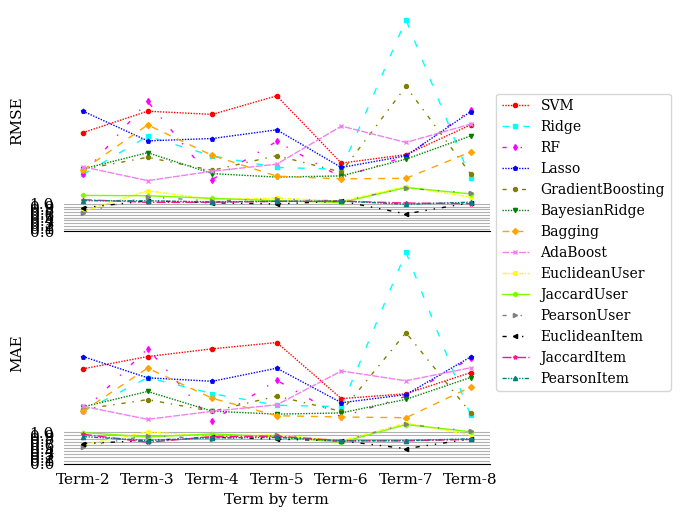

In [20]:
plot_student_based_clustering(student_cluster_reg, student_cluster_cb_user, student_cluster_cb_item)

Figure 7 (not weighted average):

In [23]:
with open('../results/nn_results.json') as fr:
    nn = json.load(fr)

In [25]:
with open('../results/naive_bayes_results.json') as fr:
    nb = json.load(fr)

In [27]:
with open('../results/2017 paper.json') as fr:
    cb_2017 = json.load(fr)

In [62]:
def plot_state_of_the_art(nn, nb, cb_2017):
    min_mae = {}
    mapper = {'GaussianNB': 'GNB', 'MultinomialNB': 'MNB', 'NN': 'NN'}
    
    paper_2017 = np.min(cb_2017['Euclidean Distance']['mae'])
    min_mae['CB - Cakmak (2017)'] = paper_2017
    min_mae['CF - Ibrahimzada & Cakmak (2020)'] = 0.48009886094992466
    
    nb.update(nn)
    for model in nb:
        model_name = mapper[model] + ' - Mimis et al. (2018)'
        min_mae.setdefault(model_name, 100)
        for n_training_semesters in nb[model]:
            if nb[model][n_training_semesters]['mae'][1] < min_mae[model_name]:
                min_mae[model_name] = nb[model][n_training_semesters]['mae'][1]
    
    x = np.arange(5)
    min_mae = {k: v for k, v in sorted(min_mae.items(), key=lambda item: item[1])}
    model_names = list(min_mae.keys())
    fig, ax = plt.subplots(figsize=(10, 3))
    
    hatches = ['////', '\\\\\\\\', 'xx', '--', '||']
    for i in range(len(model_names)):
        ax.bar(i, min_mae[model_names[i]], 0.8, label=model_names[i], hatch=hatches[i], color='white')
    
    for i, v in enumerate(min_mae.values()):
        ax.text(i-0.14, v + 0.1, str(round(v, 2)), fontfamily='serif', fontsize=12, fontweight='bold')
    
    ax.set_ylabel('MAE', fontfamily='serif', fontsize=12)
    ax.set_yticks(range(8))
    ax.set_yticklabels([i for i in range(8)], fontfamily='serif', fontsize=12)
    ax.legend(prop={'size': 11, 'family': 'serif'})
    ax.grid(axis='y')
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    left_side = ax.spines["left"]
    left_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)     
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    ax.tick_params(axis = "y", which = "both", left = False, right = False)
    plt.savefig('MAE state of the art.svg', bbox_inches='tight')

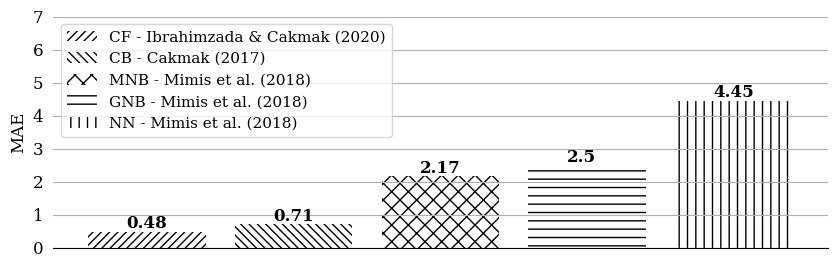

In [64]:
plot_state_of_the_art(nn, nb, cb_2017)


Figure 6 (Weighted Average):


In [67]:
def plot_state_of_the_art(nn, nb, cb_2017):
    avg_rmse = {}
    mapper = {'GaussianNB': 'GNB', 'MultinomialNB': 'MNB', 'NN': 'NN'}
    term_weights = [96/1588, 168/1588, 186/1588, 246/1588, 259/1588, 319/1588, 314/1588]
    
    paper_2017 = np.dot(cb_2017['Euclidean Distance']['rmse'], term_weights) # taking dot product of those two vectors give weighted average in this case
    avg_rmse['CB - Cakmak (2017)'] = paper_2017
    avg_rmse['CF - Ibrahimzada & Cakmak (2020)'] = 0.957744376435159
    
    nb.update(nn)
    for model in nb:
        model_name = mapper[model] + ' - Mimis et al. (2018)'
        avg_rmse.setdefault(model_name, 0)
        y = 0
        for n_training_semesters in nb[model]:
            avg_rmse[model_name] += nb[model][n_training_semesters]['rmse'][1] * term_weights[y]
            y = y + 1
    
    x = np.arange(5)
    avg_rmse = {k: v for k, v in sorted(avg_rmse.items(), key=lambda item: item[1])}
    model_names = list(avg_rmse.keys())
    fig, ax = plt.subplots(figsize=(10, 3))
    
    hatches = ['////', '\\\\\\\\', 'xx', '--', '||']
    for i in range(len(model_names)):
        ax.bar(i, avg_rmse[model_names[i]], 0.8, label=model_names[i], hatch=hatches[i], color='white')
    
    for i, v in enumerate(avg_rmse.values()):
        ax.text(i-0.14, v + 0.1, str(round(v, 2)), fontfamily='serif', fontsize=12, fontweight='bold')
    
    ax.set_ylabel('Weighted Avg RMSE', fontfamily='serif', fontsize=12)
    ax.set_yticks(range(8))
    ax.set_yticklabels([i for i in range(8)], fontfamily='serif', fontsize=12)
    ax.legend(prop={'size': 11, 'family': 'serif'})
    ax.grid(axis='y')
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    left_side = ax.spines["left"]
    left_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)     
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    ax.tick_params(axis = "y", which = "both", left = False, right = False)
    plt.savefig('Weighted Avg RMSE state of the art.svg', bbox_inches='tight')

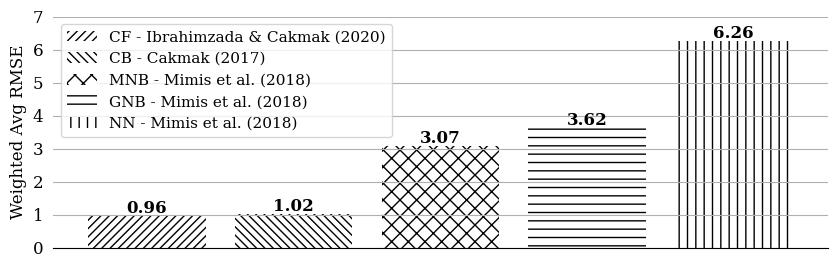

In [69]:
plot_state_of_the_art(nn, nb, cb_2017)

Figure 7 Weighted Average:

In [72]:
def plot_state_of_the_art(nn, nb, cb_2017):
    avg_mae = {}
    mapper = {'GaussianNB': 'GNB', 'MultinomialNB': 'MNB', 'NN': 'NN'}
    term_weights = [96/1588, 168/1588, 186/1588, 246/1588, 259/1588, 319/1588, 314/1588]
    
    paper_2017 = np.dot(cb_2017['Euclidean Distance']['mae'], term_weights) # taking dot product of those two vectors give weighted average in this case
    avg_mae['CB - Cakmak (2017)'] = paper_2017
    avg_mae['CF - Ibrahimzada & Cakmak (2020)'] = 0.7084374573165868
    
    nb.update(nn)
    for model in nb:
        model_name = mapper[model] + ' - Mimis et al. (2018)'
        avg_mae.setdefault(model_name, 0)
        y = 0
        for n_training_semesters in nb[model]:
            avg_mae[model_name] += nb[model][n_training_semesters]['mae'][1] * term_weights[y]
            y = y + 1
    
    x = np.arange(5)
    avg_mae = {k: v for k, v in sorted(avg_mae.items(), key=lambda item: item[1])}
    model_names = list(avg_mae.keys())
    fig, ax = plt.subplots(figsize=(10, 3))
    
    hatches = ['////', '\\\\\\\\', 'xx', '--', '||']
    for i in range(len(model_names)):
        ax.bar(i, avg_mae[model_names[i]], 0.8, label=model_names[i], hatch=hatches[i], color='white')
    
    for i, v in enumerate(avg_mae.values()):
        ax.text(i-0.14, v + 0.1, str(round(v, 2)), fontfamily='serif', fontsize=12, fontweight='bold')
    
    ax.set_ylabel('Weighted Avg MAE', fontfamily='serif', fontsize=12)
    ax.set_yticks(range(8))
    ax.set_yticklabels([i for i in range(8)], fontfamily='serif', fontsize=12)
    ax.legend(prop={'size': 11, 'family': 'serif'})
    ax.grid(axis='y')
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    left_side = ax.spines["left"]
    left_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)     
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
    ax.tick_params(axis = "y", which = "both", left = False, right = False)
    plt.savefig('Weighted Avg MAE state of the art.svg', bbox_inches='tight')

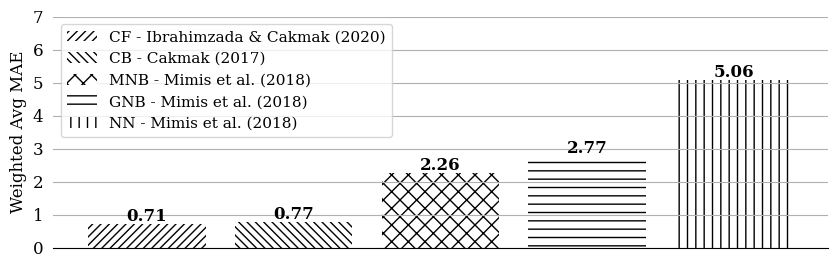

In [74]:
plot_state_of_the_art(nn, nb, cb_2017)